In [51]:
import numpy as np
from matplotlib import pyplot as plt
import math
m = 100
CONVERGENCE_THRESHOLD = 1.1e-15

In [14]:
X = np.zeros(shape=(100,3))
f1 = open('./q3/logisticX.csv','r')
Y = np.zeros(shape = (100,1))
f2 = open('./q3/logisticY.csv','r')

cnt = 0
for x in f1:
    lt = x.split(',')
    X[cnt][0] = 1
    X[cnt][1] = lt[0]
    X[cnt][2] = lt[1]
    cnt += 1
cnt=0
for x in f2:
    Y[cnt][0] = int(x)

In [15]:
# def hessian(theta, )
def sigma(x):
    return 1/(1+math.exp(-1*x))

In [68]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(X[:50,1], X[:50,2], "or")
    plt.plot(X[50:,1], X[50:,2], "or")
#     for i in range(m):
#         if(Y[i][0]==1):
#             plt.plot(X[i][1], X[i][2], "or")
#         elif (Y[i][0]==0):
#             plt.plot(X[i][1], X[i][2], "ob")
    plt.plot(x_vals, y_vals)

In [69]:
theta = np.zeros(shape = (3,1))
S = np.zeros(shape = (m,m))
first_derivative = np.zeros(shape = (3,1))
pi = np.dot(X, theta)

prev_theta = np.ones(shape = (3,1))
for i in range(10000):
    pi = np.dot(X, theta)
    for j in range(m):
        pi[j][0] = sigma(pi[j][0])
    
    for j in range(m):
        S[j][j] = pi[j][0] * (1-pi[j][0])
    first_derv = np.dot(X.T, np.subtract(pi, Y))
    H = np.dot(np.dot(X.T,S),X)
    H_inv = np.linalg.inv(H)
    delta = np.dot(H_inv, first_derv)
    prev_theta = theta
    theta = np.subtract(theta, delta)
    sum = 0
    for c in range(3):
        sum += abs(np.subtract(prev_theta,theta)[c])
    if(sum<CONVERGENCE_THRESHOLD):
        print(sum)
        print('Iteration: %s' % str(i))
        break
    else:
        print(sum)
print("Final Parameters: ", theta)

[1.79635631]
[0.70618848]
[0.38889586]
[1.53235667]
[1.67801479]
[0.58316226]
[0.04684805]
[0.00029987]
[1.24389338e-08]
[1.57651669e-14]
[2.0206059e-14]
[2.26485497e-14]
[3.74145159e-14]
[2.99760217e-14]
[2.08721929e-14]
[1.55431223e-15]
[9.65894031e-15]
[1.34336986e-14]
[2.99760217e-15]
[7.21644966e-15]
[1.31006317e-14]
[1.31006317e-14]
[1.44328993e-15]
[1.14352972e-14]
[1.3211654e-14]
[3.44169138e-15]
[1.44328993e-15]
[4.6629367e-15]
[9.32587341e-15]
[1.99840144e-15]
[8.9928065e-15]
[1.44328993e-14]
[9.76996262e-15]
[7.77156117e-16]
Iteration: 33
Final Parameters:  [[ 0.76311601]
 [-0.73164417]
 [-0.51600465]]


TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

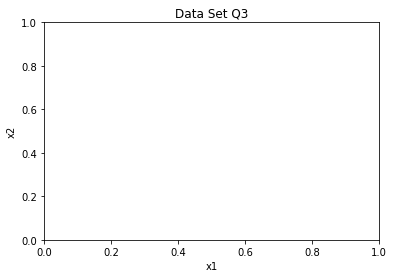

In [70]:
plt.title("Data Set Q3") 
plt.xlabel("x1") 
plt.ylabel("x2") 
abline(-1*theta[0]/theta[1], -1*theta[2]/theta[1])